# NBA STATS 2021 PER GAME

In [487]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import classification_report, confusion_matrix
import mglearn 
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# https://www.basketball-reference.com/leagues/NBA_2021_per_game.html


# https://www.basketball-reference.com/wnba/years/2021_per_game.html

Сите атрибути при што ќе правам анализа.

1. Pos Positon
2. Age Age
3. Tm Team
4. G Games
5. GS Games started
6. MP Minutes played
7. FG Field Goals
8. FGA Field Goal Attempts
9. FG% Field Goal Percentage
10. 3P 3point Made
11. 3PA 3point Attempts
12. 3P% 3point Percentage
13. 2P 2point Maed
14. 2PA 2point Attempts
15. 2P% 2point Percentage
16. eFG% Effective FG
17. FT Free Throw
18. FTA Free Throw Attempts
19. ORB Offensive Rebounds
20. DRB Defensive Rebounds
21. TRB Total Rebounds
22. AST Assists
23. STL Steals
24. BLK Blocks
25. TOV Turnovers
26. PF Personal fouls
27. PTS Points per Game

In [387]:
dfman = pd.read_csv('NBA-Stats-2021.csv')
dfman.insert(2, 'Gender',1) 
dfman

Player    Pos  Gender  Age   Tm   G  GS    MP    FG  \
0            Precious Achiuwa     PF       1   21  MIA  61   4  12.1   2.0   
1                Jaylen Adams     PG       1   24  MIL   7   0   2.6   0.1   
2                Steven Adams      C       1   27  NOP  58  58  27.7   3.3   
3                 Bam Adebayo      C       1   23  MIA  64  64  33.5   7.1   
4           LaMarcus Aldridge      C       1   35  TOT  26  23  25.9   5.4   
5           Ty-Shon Alexander     SG       1   22  PHO  15   0   3.1   0.2   
6    Nickeil Alexander-Walker     SG       1   22  NOP  46  13  21.9   4.2   
7               Grayson Allen     SG       1   25  MEM  50  38  25.2   3.5   
8               Jarrett Allen      C       1   22  TOT  63  45  29.6   4.7   
9             Al-Farouq Aminu     PF       1   30  TOT  23  14  18.9   1.7   
10              Kyle Anderson     PF       1   27  MEM  69  69  27.3   4.5   
11      Giannis Antetokounmpo     PF       1   26  MIL  61  61  33.0  10.3   
12       Kostas Antetokounmpo     PF       1   23  LAL  15   0   3.7   0.2   
13     Thanasis Antetokounmpo     SF       1   28  MIL  57   3   9.7   1.2   
14            Carmelo Anthony     PF       1   36  POR  69   3  24.5   4.7   
15               Cole Anthony     PG       1   20  ORL  47  34  27.1   4.7   
16                 OG Anunoby     SF       1   23  TOR  43  43  33.3   5.8   
17           Ryan Arcidiacono     PG       1   26  CHI  44   0  10.2   1.1   
18               Trevor Ariza     SF       1   35  MIA  30  27  28.0   3.3   
19              D.J. Augustin     PG       1   33  TOT  57  12  19.8   2.4   
20                Deni Avdija     SF       1   20  WAS  54  32  23.3   2.4   
21              Deandre Ayton      C       1   22  PHO  69  69  30.7   6.2   
22             Udoka Azubuike      C       1   21  UTA  15   0   3.8   0.3   
23               Dwayne Bacon     SG       1   25  ORL  72  50  25.7   4.1   
24          Marvin Bagley III     PF       1   21  SAC  43  42  25.9   5.7   
25                LaMelo Ball     PG       1   19  CHO  51  31  28.8   5.7   
26                 Lonzo Ball     PG       1   23  NOP  55  55  31.8   5.3   
27                   Mo Bamba      C       1   22  ORL  46   5  15.8   3.1   
28               Desmond Bane     SG       1   22  MEM  68  17  22.3   3.4   
29            Harrison Barnes     PF       1   28  SAC  58  58  36.2   5.5   
30                 RJ Barrett     SG       1   20  NYK  72  72  34.9   6.5   
31                Will Barton     SF       1   30  DEN  56  52  31.0   4.6   
32           Keita Bates-Diop     SF       1   25  SAS  30   0   8.2   1.0   
33              Nicolas Batum     SF       1   32  LAC  67  38  27.4   2.9   
34                Aron Baynes      C       1   34  TOR  53  31  18.5   2.5   
35              Kent Bazemore     SF       1   31  GSW  67  18  19.9   2.6   
36              Darius Bazley     PF       1   20  OKC  55  55  31.2   5.0   
37               Bradley Beal     SG       1   27  WAS  60  60  35.8  11.2   
38              Malik Beasley     SG       1   24  MIN  37  36  32.8   7.1   
39                Jordan Bell      C       1   26  TOT   6   1  13.7   1.2   
40            DeAndre' Bembry     SF       1   26  TOR  51  12  19.1   2.3   
41            DÄvis BertÄns     PF       1   28  WAS  57   7  25.7   3.4   
42           Patrick Beverley     PG       1   32  LAC  37  34  22.5   2.5   
43                 Saddiq Bey     SF       1   21  DET  70  53  27.3   4.0   
44                  Tyler Bey     SF       1   22  DAL  18   0   3.9   0.4   
45                 Khem Birch      C       1   28  TOT  67  22  22.8   2.8   
46               Goga Bitadze      C       1   21  IND  45   3  12.5   1.8   
47            Bismack Biyombo      C       1   28  CHO  66  36  20.4   2.2   
48            Nemanja Bjelica     PF       1   32  TOT  37   3  16.1   2.4   
49               Eric Bledsoe     SG       1   31  NOP  71  70  29.7   4.3   
50             Keljin Blevins     SF       1 

In [388]:
dfwoman = pd.read_csv('WNBA-Stats-2021.csv')
dfwoman.insert(2, 'Gender',0) 
dfwoman

Player   Tm  Gender  Pos  Age   G  GS    MP   FG   FGA  \
0                Tina Charles  WAS       0    C   27  27  27  33.3  8.8  19.6   
1             Brittney Griner  PHO       0    C   30  30  30  32.8  8.3  14.4   
2             Breanna Stewart  SEA       0    F   28  28  28  33.4  6.9  15.8   
3               Jonquel Jones  CON       0    F   27  27  27  31.7  7.1  13.8   
4            Arike Ogunbowale  DAL       0    G   32  32  32  31.3  6.2  16.3   
5                 A'ja Wilson  LVA       0    F   32  32  32  31.9  6.5  14.6   
6                 Jewell Loyd  SEA       0    G   31  31  31  31.0  6.2  14.8   
7             Kelsey Mitchell  IND       0    G   32  32  32  33.1  6.6  15.4   
8        Skylar Diggins-Smith  PHO       0    G   32  32  32  32.5  5.5  12.3   
9              Betnijah Laney  NYL       0  G-F   32  32  32  33.4  6.3  14.1   
10          Courtney Williams  ATL       0    G   32  32  32  34.4  7.1  17.1   
11               Ariel Atkins  WAS       0    G   30  30  30  30.6  5.4  13.2   
12           Napheesa Collier  MIN       0    F   29  29  29  34.6  6.0  13.7   
13             Natasha Howard  NYL       0    F   13  13  13  27.5  6.7  13.5   
14              Sylvia Fowles  MIN       0    C   31  31  31  30.1  6.7  10.5   
15             DeWanna Bonner  CON       0  F-G   32  32  32  31.9  5.0  12.6   
16              Diana Taurasi  PHO       0    G   16  16  16  28.4  4.4  11.9   
17                Kelsey Plum  LVA       0    G   26  26   0  25.6  4.9  11.3   
18              Tiffany Hayes  ATL       0    G   21  21  19  28.3  5.0  11.4   
19              Brionna Jones  CON       0    F   32  32  32  30.6  6.1  10.6   
20             Nneka Ogwumike  LAS       0    F   18  18  18  31.7  6.1  11.4   
21             Kahleah Copper  CHI       0  G-F   32  32  32  30.8  5.4  11.8   
22                Liz Cambage  LVA       0    C   25  25  24  23.8  5.6  10.3   
23            Chennedy Carter  ATL       0    G   11  11  11  25.5  5.5  12.0   
24          Elena Delle Donne  WAS       0  F-G    3   3   3  17.3  4.3   9.0   
25              Kayla McBride  MIN       0    G   32  32  32  31.6  4.5  10.3   
26              Erica Wheeler  LAS       0    G   32  32  32  30.2  5.0  12.0   
27              Aerial Powers  MIN       0    G   14  14   7  22.1  4.4  10.2   
28              Marina Mabrey  DAL       0    G   32  32   8  24.2  4.9  12.2   
29             Candace Parker  CHI       0  F-C   23  23  23  26.7  5.0  11.0   
30              Allie Quigley  CHI       0    G   26  26  11  24.4  4.7  10.4   
31         Myisha Hines-Allen  WAS       0    F   18  18  17  25.7  4.9  11.9   
32               Jackie Young  LVA       0    G   32  32  32  31.8  4.8   9.6   
33           Tiffany Mitchell  IND       0    G   28  28  25  27.3  3.8   9.1   
34               Allisha Gray  DAL       0    G   25  25  16  27.8  4.2   9.7   
35              Satou Sabally  DAL       0    F   17  17  14  24.9  4.1   9.7   
36            Sabrina Ionescu  NYL       0    G   30  30  26  30.0  3.8   9.9   
37              Sami Whitcomb  NYL       0    G   30  30  28  28.1  4.1   8.7   
38              Dearica Hamby  LVA       0    F   29  29   0  24.5  4.4   8.0   
39          Diamond DeShields  CHI       0    G   32  32  22  26.9  3.8   9.8   
40             Teaira McCowan  IND       0    C   32  32  23  26.5  4.3   8.0   
41               Chelsea Gray  LVA       0    G   32  32  32  28.9  4.6  10.2   
42          Isabelle Harrison  DAL       0    F   28  28   5  23.8  4.6   8.6   
43             Jasmine Thomas  CON       0    G   30  30  30  29.6  3.8   9.8   
44       Courtney Vandersloot  CHI       0    G   32  32  32  30.5  4.0   9.3   
45            Riquna Williams  LVA       0    G   32  32  32  26.0  3.6   8.0   
46            Cheyenne Parker  ATL       0    F   13  13  11  20.8  3.8   8.5   
47                   Sue Bird  SEA       0    G   30  30  30  27.7  3.5   8.2   
48          Danielle Robinson  IND       0    G   24  

In [389]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
frames = [dfman, dfwoman]
df = pd.concat(frames)
df

Player    Pos  Gender  Age   Tm   G  GS    MP    FG  \
0            Precious Achiuwa     PF       1   21  MIA  61   4  12.1   2.0   
1                Jaylen Adams     PG       1   24  MIL   7   0   2.6   0.1   
2                Steven Adams      C       1   27  NOP  58  58  27.7   3.3   
3                 Bam Adebayo      C       1   23  MIA  64  64  33.5   7.1   
4           LaMarcus Aldridge      C       1   35  TOT  26  23  25.9   5.4   
5           Ty-Shon Alexander     SG       1   22  PHO  15   0   3.1   0.2   
6    Nickeil Alexander-Walker     SG       1   22  NOP  46  13  21.9   4.2   
7               Grayson Allen     SG       1   25  MEM  50  38  25.2   3.5   
8               Jarrett Allen      C       1   22  TOT  63  45  29.6   4.7   
9             Al-Farouq Aminu     PF       1   30  TOT  23  14  18.9   1.7   
10              Kyle Anderson     PF       1   27  MEM  69  69  27.3   4.5   
11      Giannis Antetokounmpo     PF       1   26  MIL  61  61  33.0  10.3   
12       Kostas Antetokounmpo     PF       1   23  LAL  15   0   3.7   0.2   
13     Thanasis Antetokounmpo     SF       1   28  MIL  57   3   9.7   1.2   
14            Carmelo Anthony     PF       1   36  POR  69   3  24.5   4.7   
15               Cole Anthony     PG       1   20  ORL  47  34  27.1   4.7   
16                 OG Anunoby     SF       1   23  TOR  43  43  33.3   5.8   
17           Ryan Arcidiacono     PG       1   26  CHI  44   0  10.2   1.1   
18               Trevor Ariza     SF       1   35  MIA  30  27  28.0   3.3   
19              D.J. Augustin     PG       1   33  TOT  57  12  19.8   2.4   
20                Deni Avdija     SF       1   20  WAS  54  32  23.3   2.4   
21              Deandre Ayton      C       1   22  PHO  69  69  30.7   6.2   
22             Udoka Azubuike      C       1   21  UTA  15   0   3.8   0.3   
23               Dwayne Bacon     SG       1   25  ORL  72  50  25.7   4.1   
24          Marvin Bagley III     PF       1   21  SAC  43  42  25.9   5.7   
25                LaMelo Ball     PG       1   19  CHO  51  31  28.8   5.7   
26                 Lonzo Ball     PG       1   23  NOP  55  55  31.8   5.3   
27                   Mo Bamba      C       1   22  ORL  46   5  15.8   3.1   
28               Desmond Bane     SG       1   22  MEM  68  17  22.3   3.4   
29            Harrison Barnes     PF       1   28  SAC  58  58  36.2   5.5   
30                 RJ Barrett     SG       1   20  NYK  72  72  34.9   6.5   
31                Will Barton     SF       1   30  DEN  56  52  31.0   4.6   
32           Keita Bates-Diop     SF       1   25  SAS  30   0   8.2   1.0   
33              Nicolas Batum     SF       1   32  LAC  67  38  27.4   2.9   
34                Aron Baynes      C       1   34  TOR  53  31  18.5   2.5   
35              Kent Bazemore     SF       1   31  GSW  67  18  19.9   2.6   
36              Darius Bazley     PF       1   20  OKC  55  55  31.2   5.0   
37               Bradley Beal     SG       1   27  WAS  60  60  35.8  11.2   
38              Malik Beasley     SG       1   24  MIN  37  36  32.8   7.1   
39                Jordan Bell      C       1   26  TOT   6   1  13.7   1.2   
40            DeAndre' Bembry     SF       1   26  TOR  51  12  19.1   2.3   
41            DÄvis BertÄns     PF       1   28  WAS  57   7  25.7   3.4   
42           Patrick Beverley     PG       1   32  LAC  37  34  22.5   2.5   
43                 Saddiq Bey     SF       1   21  DET  70  53  27.3   4.0   
44                  Tyler Bey     SF       1   22  DAL  18   0   3.9   0.4   
45                 Khem Birch      C       1   28  TOT  67  22  22.8   2.8   
46               Goga Bitadze      C       1   21  IND  45   3  12.5   1.8   
47            Bismack Biyombo      C       1   28  CHO  66  36  20.4   2.2   
48            Nemanja Bjelica     PF       1   32  TOT  37   3  16.1   2.4   
49               Eric Bledsoe     SG       1   31  NOP  71  70  29.7   4.3   
50             Keljin Blevins     SF       1 

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 154
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  655 non-null    object 
 1   Pos     655 non-null    object 
 2   Gender  655 non-null    int64  
 3   Age     655 non-null    int64  
 4   Tm      655 non-null    object 
 5   G       655 non-null    int64  
 6   GS      655 non-null    int64  
 7   MP      655 non-null    float64
 8   FG      655 non-null    float64
 9   FGA     655 non-null    float64
 10  FG%     651 non-null    float64
 11  3P      655 non-null    float64
 12  3PA     655 non-null    float64
 13  3P%     619 non-null    float64
 14  2P      655 non-null    float64
 15  2PA     655 non-null    float64
 16  2P%     646 non-null    float64
 17  eFG%    499 non-null    float64
 18  FT      655 non-null    float64
 19  FTA     655 non-null    float64
 20  FT%     627 non-null    float64
 21  ORB     655 non-null    float64
 22  DR

In [391]:
df.isnull().sum()

Player      0
Pos         0
Gender      0
Age         0
Tm          0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%         4
3P          0
3PA         0
3P%        36
2P          0
2PA         0
2P%         9
eFG%      156
FT          0
FTA         0
FT%        28
ORB         0
DRB       155
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

    Тука гледаме дека има нул вредности. Бидејќи не се толку мали бројки 4, 28 одлучив да ги тргнам сите редици кој имат нул вредности. Све со цел да добивам што по добри заклучоци. 

In [392]:
df['FG%'] = df['FG%'].fillna(0)
df['FT%'] = df['FT%'].fillna(0)

df.drop('eFG%',
  axis='columns', inplace=True)
df.drop('DRB',
  axis='columns', inplace=True)

In [393]:
df.isnull().sum()

Player     0
Pos        0
Gender     0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%       36
2P         0
2PA        0
2P%        9
FT         0
FTA        0
FT%        0
ORB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [394]:
df = df.fillna(0)
df.isnull().sum()

Player    0
Pos       0
Gender    0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
FT        0
FTA       0
FT%       0
ORB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [395]:
pd.set_option('display.max_columns', None) 
df.describe()

Gender         Age           G          GS          MP          FG  \
count  655.000000  655.000000  655.000000  655.000000  655.000000  655.000000   
mean     0.763359   24.980153   37.786260   17.941985   19.637405    3.137557   
std      0.425345    6.017144   20.414889   21.193076    9.202733    2.242478   
min      0.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
25%      1.000000   22.000000   23.000000    1.000000   12.350000    1.400000   
50%      1.000000   25.000000   35.000000    8.000000   19.500000    2.700000   
75%      1.000000   29.000000   56.000000   31.000000   27.400000    4.400000   
max      1.000000   40.000000   72.000000   72.000000   37.600000   11.200000   

              FGA         FG%          3P         3PA         3P%          2P  \
count  655.000000  655.000000  655.000000  655.000000  655.000000  655.000000   
mean     6.943511    0.435519    0.929618    2.629313    0.294496    2.209924   
std      4.629451    0.113150    0.871170    2.201791    0.147260    1.802006   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.400000    0.393000    0.200000    0.800000    0.249000    0.900000   
50%      6.000000    0.438000    0.700000    2.200000    0.333000    1.700000   
75%      9.500000    0.486000    1.500000    4.000000    0.385000    3.100000   
max     23.000000    1.000000    5.300000   12.700000    1.000000    9.200000   

              2PA         2P%          FT         FTA         FT%         ORB  \
count  655.000000  655.000000  655.000000  655.000000  655.000000  655.000000   
mean     4.317863    0.490023    1.341985    1.716794    0.726191    0.805496   
std      3.324849    0.137000    1.288288    1.547265    0.207734    0.714528   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.800000    0.444000    0.500000    0.700000    0.674500    0.300000   
50%      3.400000    0.500000    0.900000    1.300000    0.778000    0.600000   
75%      6.000000    0.562000    1.800000    2.200000    0.846500    1.100000   
max     16.800000    1.000000    9.200000   10.700000    1.000000    4.700000   

              TRB         AST         STL         BLK         TOV          PF  \
count  655.000000  655.000000  655.000000  655.000000  655.000000  655.000000   
mean     3.544275    1.909008    0.628244    0.405649    1.126260    1.655115   
std      2.350905    1.738447    0.403326    0.410395    0.815999    0.763042   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.800000    0.700000    0.300000    0.100000    0.600000    1.100000   
50%      3.100000    1.400000    0.600000    0.300000    0.900000    1.700000   
75%      4.700000    2.500000    0.900000    0.500000    1.500000    2.200000   
max     14.300000   10.800000    2.100000    3.400000    5.000000    4.000000   

              PTS  
count  655.000000  
mean     8.549771  
std      6.198776  
min      0.000000  
25%      3.950000  
50%      7.100000  
75%     12.000000  
max     32.000000

Во овој чекор трбеа да анализираме добро со какви податоци работиме, повеќе се фокусираме на третот квартил и максималниот, 
за да видиме дали има некој атрибут кој има отстапување или outliers. 
Видиме дека атрибутите Rk, Age, G, GS,FG%, 3P%, 2P%, eFG% и FT% немат голема разлика во третиот и максималниот квартил.

# Check for unbalanced dataset

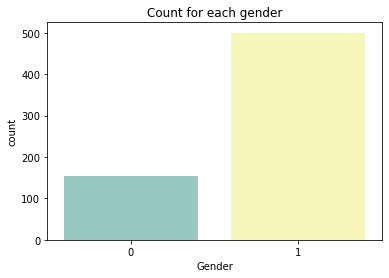

In [11]:
sns.countplot(x="Gender",data=df,palette="Set3")
plt.title("Count for each gender")
plt.show();

In [12]:
gender_num=df['Gender'].value_counts().to_frame()
gender_num.rename(columns = {'Gender':'gender_num'},inplace=True)
gender_perc=df['Gender'].value_counts(normalize=True).to_frame()
gender_perc.iloc[0] = round(gender_perc.iloc[0]*100,2)
gender_perc.iloc[1] = round(gender_perc.iloc[1]*100,2)
gender_perc.rename(columns = {'Gender':'gender_percentage'},inplace=True)
gender = pd.concat([gender_num,gender_perc],axis=1)
gender

gender_num  gender_percentage
1         500              76.34
0         155              23.66

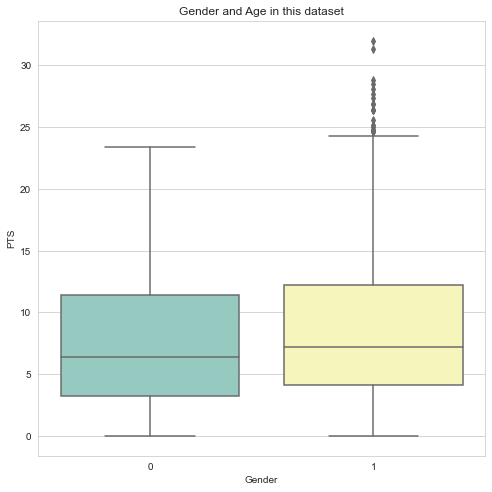

In [13]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
sns.boxplot(x ="Gender", y = 'PTS', data = df,palette='Set3')
plt.title("Gender and Age in this dataset")
plt.show()

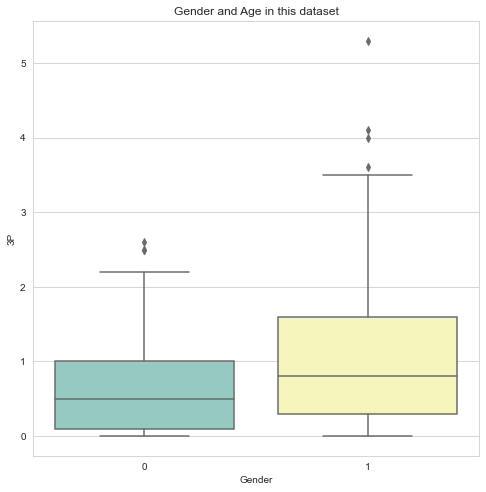

In [14]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
sns.boxplot(x ="Gender", y = '3P', data = df,palette='Set3')
plt.title("Gender and Age in this dataset")
plt.show()

### Заклучок
#### Со овие box plot се трудив да прикажам колку плот влиае врз просечниот број на 3 Point Made, и може да видиме дека навистина има голема разлика.



In [15]:
field_goals_percentage = df.groupby(['Tm']).mean()['FG%']
field_goals_percentage.head()

Tm
ATL    0.418821
BOS    0.464300
BRK    0.449059
CHI    0.413182
CHO    0.460071
Name: FG%, dtype: float64

In [16]:
two_points_percentage = df[(df['2PA'] > 0)].groupby(['Tm']).mean()['2P%']
two_points_percentage.head()

Tm
ATL    0.461821
BOS    0.527800
BRK    0.538882
CHI    0.480091
CHO    0.532846
Name: 2P%, dtype: float64

In [17]:
three_points_percentage = df[(df['3PA'] > 0)].groupby(['Tm']).mean()['3P%']
three_points_percentage.head()

Tm
ATL    0.272920
BOS    0.313889
BRK    0.295312
CHI    0.273091
CHO    0.316769
Name: 3P%, dtype: float64

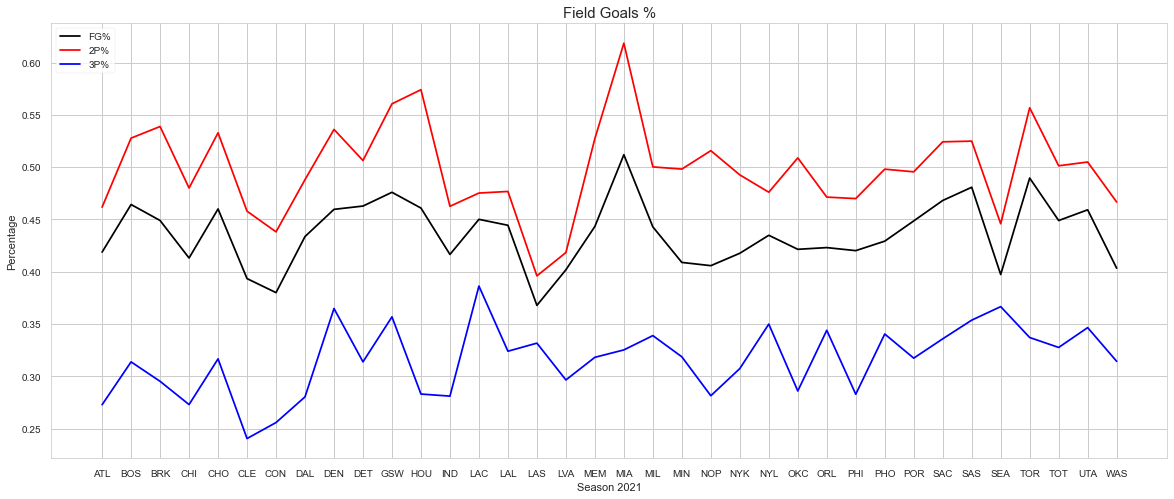

In [18]:
mpl.style.use('seaborn-notebook')
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(field_goals_percentage,data=df,color='k')
plt.plot(two_points_percentage,data=df,color='r')
plt.plot(three_points_percentage,data=df,color='b')
plt.legend(loc='upper left')
ax.set_xlabel('Season 2021')
ax.set_ylabel('Percentage')
ax.set_title('Field Goals %')
ax.title.set_size(15);

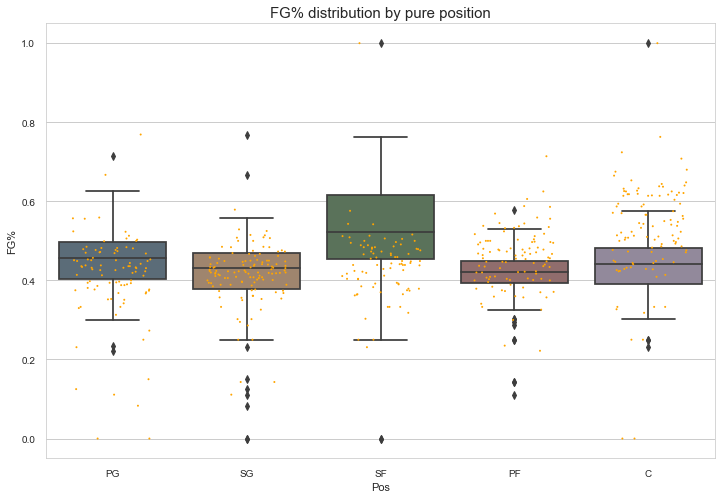

In [19]:
pure_positions = df[(df.Pos.isin(['PG','SG','SF','PF','C']))]
fg_per_pure_positions = pure_positions['FG%']
ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x=pure_positions.Pos, y=fg_per_pure_positions, saturation=0.2)
ax = sns.stripplot(x=pure_positions.Pos, y=fg_per_pure_positions, color="orange", jitter=0.3, size=2.0, order=['PG', 'SG','SF','PF','C'])
ax.set_title('FG% distribution by pure position')
ax.title.set_size(15);

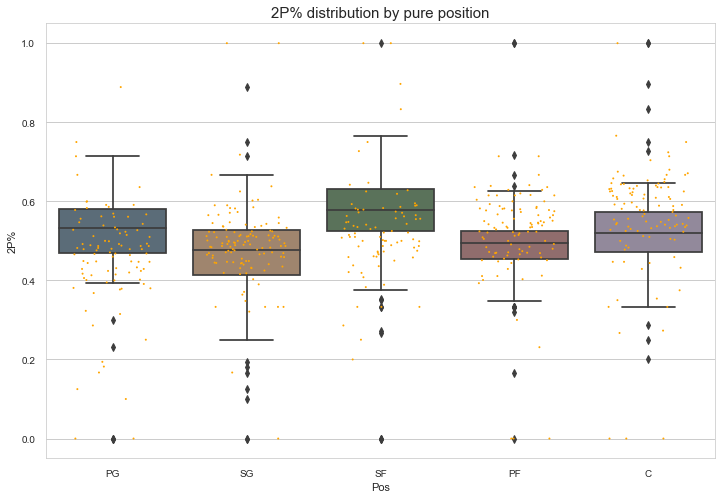

In [20]:
twopoints_per_pure_positions = pure_positions['2P%']
ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x=pure_positions.Pos, y=twopoints_per_pure_positions, saturation=0.2)
ax = sns.stripplot(x=pure_positions.Pos, y=twopoints_per_pure_positions, color="orange", jitter=0.3, size=2.0, order=['PG', 'SG','SF','PF','C'])
ax.set_title('2P% distribution by pure position')
ax.title.set_size(15);

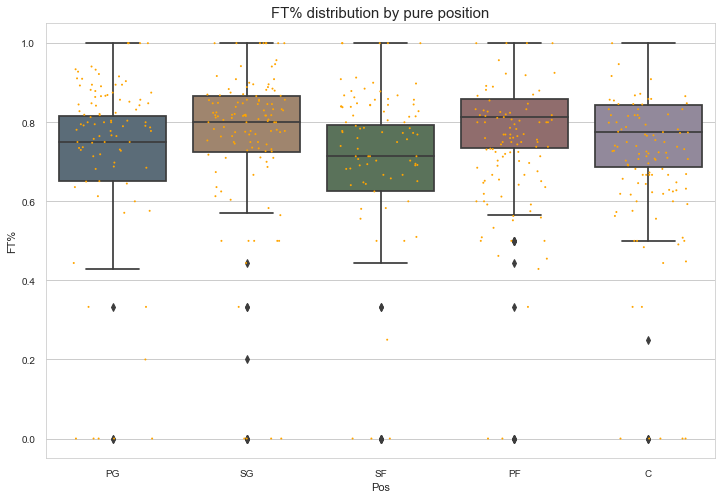

In [21]:
freethrow_per_pure_positions = pure_positions['FT%']
ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x=pure_positions.Pos, y=freethrow_per_pure_positions, saturation=0.2)
ax = sns.stripplot(x=pure_positions.Pos, y=freethrow_per_pure_positions, color="orange", jitter=0.3, size=2.0, order=['PG', 'SG','SF','PF','C'])
ax.set_title('FT% distribution by pure position')
ax.title.set_size(15);

# Corellation

In [22]:
total_points = df.groupby(['Tm']).sum()['PTS']
total_points.head()

Tm
ATL    235.3
BOS     98.4
BRK    151.7
CHI    168.5
CHO    123.4
Name: PTS, dtype: float64

In [23]:
two_points = df[(df['2P%'] > 0.0)].groupby(["Tm"]).sum()['2P%']
two_points.head()

Tm
ATL    12.931
BOS     5.278
BRK     9.161
CHI    10.562
CHO     6.927
Name: 2P%, dtype: float64

In [24]:
three_points =df[df['3P%'] > 0.0].groupby(["Tm"]).sum()['3P%']
three_points.head()

Tm
ATL    6.823
BOS    2.825
BRK    4.725
CHI    6.008
CHO    4.118
Name: 3P%, dtype: float64

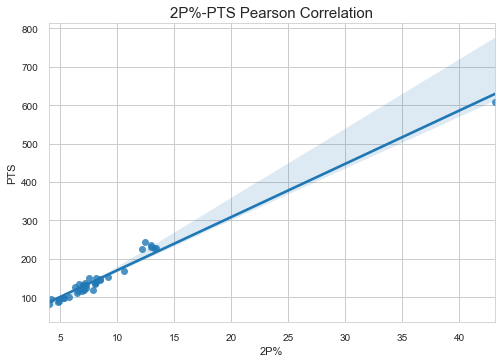

In [25]:
ax = sns.regplot(x= two_points, y=total_points)
ax.set_title('2P%-PTS Pearson Correlation')
ax.title.set_size(15);

In [26]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(two_points,total_points)
print('Pearsons correlation between 2 Point & Total Points %.3f' % corr + ' and p-value: {}'.format(p_value) )

Pearsons correlation between 2 Point & Total Points 0.989 and p-value: 6.642086836010449e-30


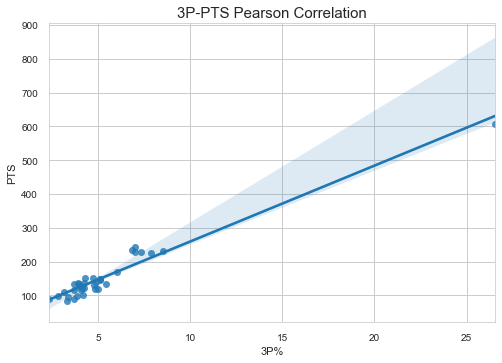

In [27]:
ax = sns.regplot(x= three_points, y= total_points)
ax.set_title('3P-PTS Pearson Correlation')
ax.title.set_size(15)

In [468]:
corr, p_value = pearsonr(three_points,total_points)
print('Pearsons correlation between 3 Point & Total Points %.3f' % corr + ' and p-value: {}'.format(p_value) )

Pearsons correlation between 3 Point & Total Points 0.975 and p-value: 1.032564843830192e-23


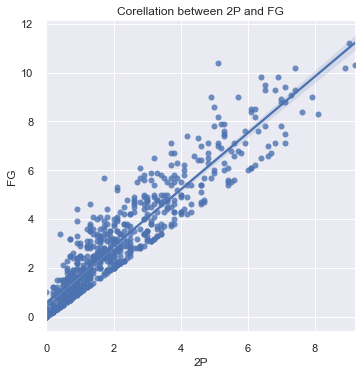

In [469]:
sns.set_theme()
sns.lmplot(x="2P",y="FG",data=df)
plt.title("Corellation between 2P and FG")
plt.show();

In [470]:
corr, p_value = pearsonr(df['2P'],df['FG'])
print('Pearsons correlation between 2 Point & Field Goals %.3f' % corr + ' and p-value: {}'.format(p_value) )

Pearsons correlation between 2 Point & Field Goals 0.930 and p-value: 1.0014344725979895e-286


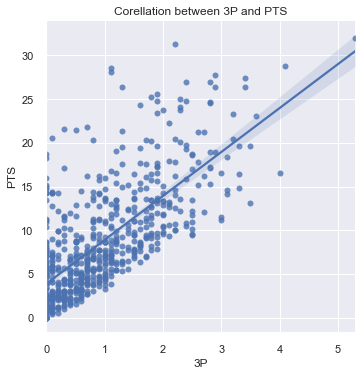

In [471]:
sns.set_theme()
sns.lmplot(x="3P",y="PTS",data=df)
plt.title("Corellation between 3P and PTS")
plt.show();

In [472]:
corr, p_value = pearsonr(df['3P'],df['PTS'])
print('Pearsons correlation between 3 Point & Points per Game %.3f' % corr + ' and p-value: {}'.format(p_value))

Pearsons correlation between 3 Point & Points per Game 0.706 and p-value: 9.992187118827682e-100


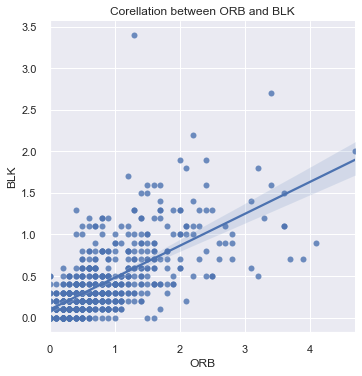

In [473]:
sns.set_theme()
sns.lmplot(x="ORB",y="BLK",data=df)
plt.title("Corellation between ORB and BLK")
plt.show();

In [36]:
corr, p_value = pearsonr(df['ORB'],df['BLK'])
print('Pearsons correlation between Ofensive Rebounds & Blocks %.3f' % corr + ' and p-value: {}'.format(p_value))

Pearsons correlation between Ofensive Rebounds & Blocks 0.668 and p-value: 8.61572655206111e-86


###  Заклучок

За атрибутите:
    
    Групиран по тим (2P% - PTS)
    Групиран по тим (3P% - PTS)
    2P - FG
    3P - PTS
    ORB - BLK
    
Се строго корелирани меѓу себе, каде што пирсон коефициент е плисгу до +1, или по точно +0,7, 
откако п вредноста е многу помала од 0,001.


Во првите два графа правам групирање по тимови да знам како тие исти атрибути се корелирани, и заклучив дека атрибутот 
3P со PTS не групирано е во граница на строго корелиран тип. 

За offensive rebound атрибутот со Blocks одлучив да ги оставам двата бидејќи овие атрибути се 
различни и подобро би бил ако не се тргне некој од овие атрибути.

    

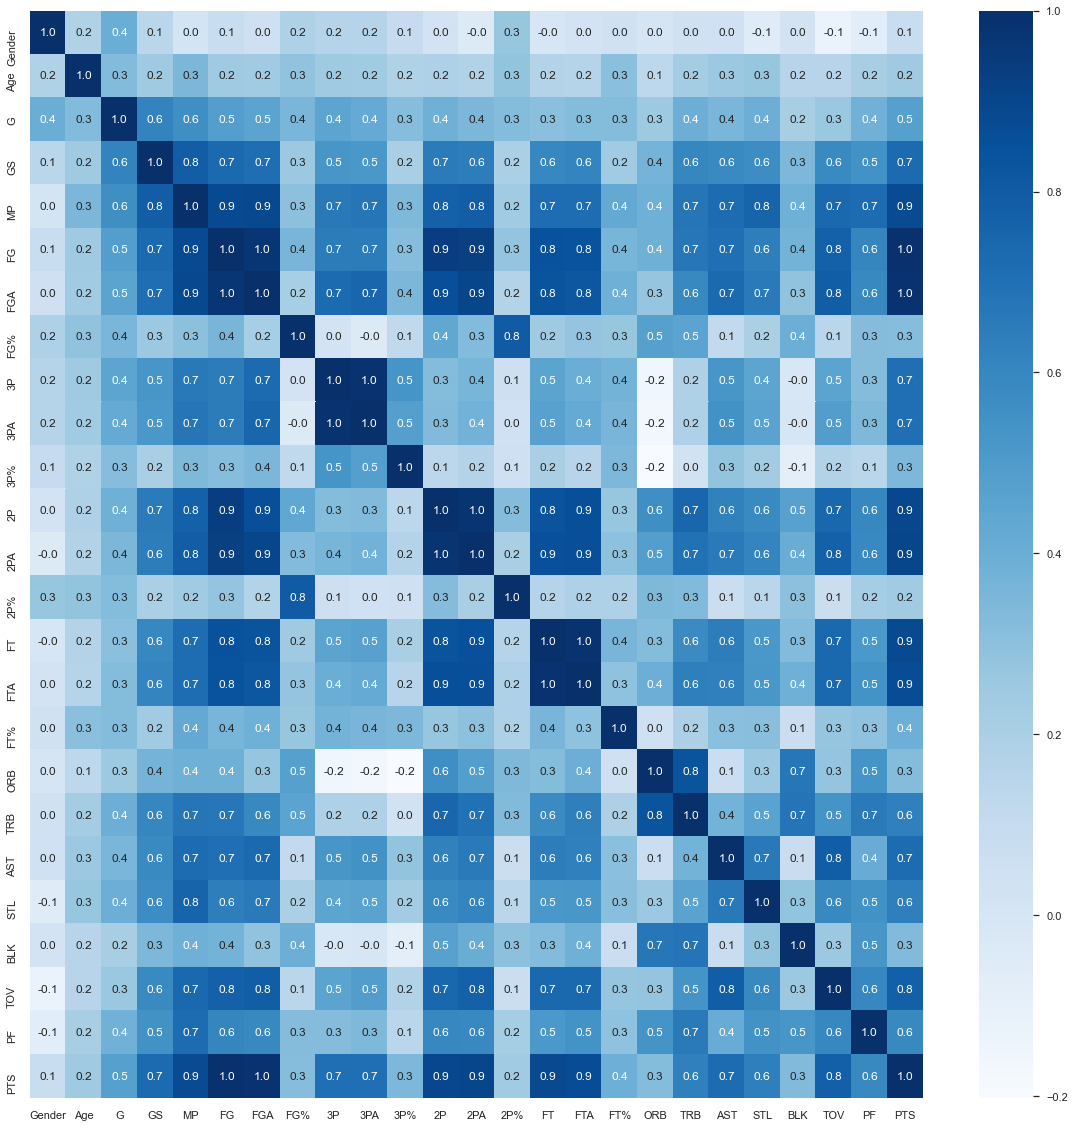

In [37]:
nba_correlation = df.corr()

ax = plt.figure(figsize=(20,20))
sns.heatmap(nba_correlation, cbar=True, fmt='.1f', annot=True, cmap='Blues');

## Histograms

Text(0.5, 0.98, 'Kernel Density and Histogram')

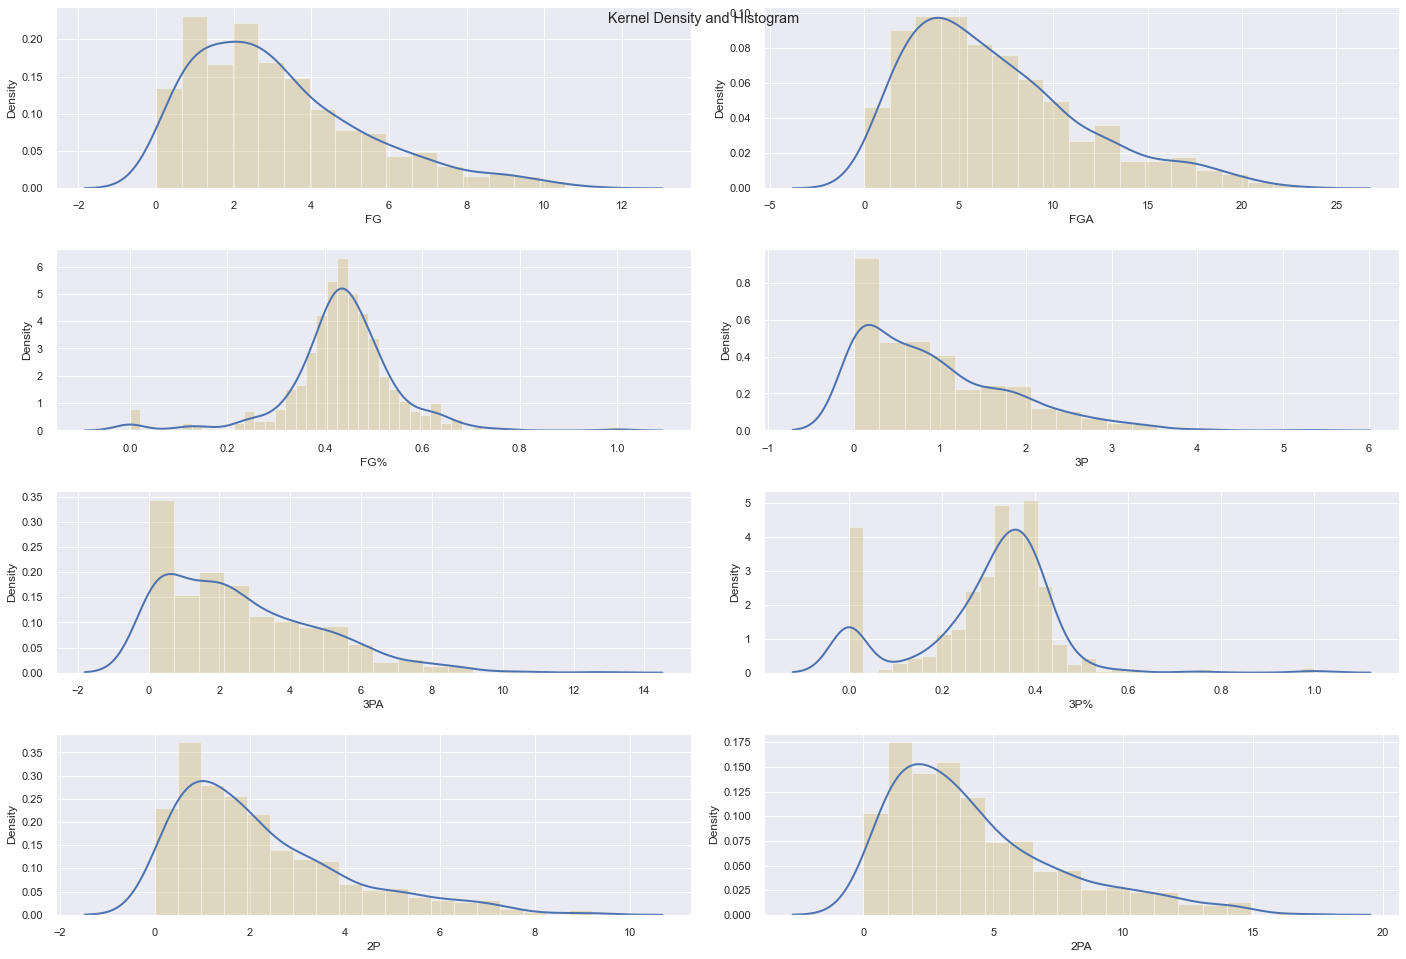

In [38]:
fig = plt.figure(figsize=(20,20))
for index,column in enumerate(list(df.columns[8:16])):
    plt.subplot(6,2,index+1)
    sns.distplot(df.loc[:,column], hist_kws={"color":"y"}, kde_kws={"color":"b","lw":2})
fig.tight_layout(pad=2)
fig.suptitle("Kernel Density and Histogram")

## Заклучок

##### Со помош на прикажување на дистрибуцијата ние може да го мериме веројатностата на густината за даден атрибут.
##### Во овој сучај може да заклучиме дека голем дел на атрибутите се Right Skewed(Non-Normal).

## Detect Outliers

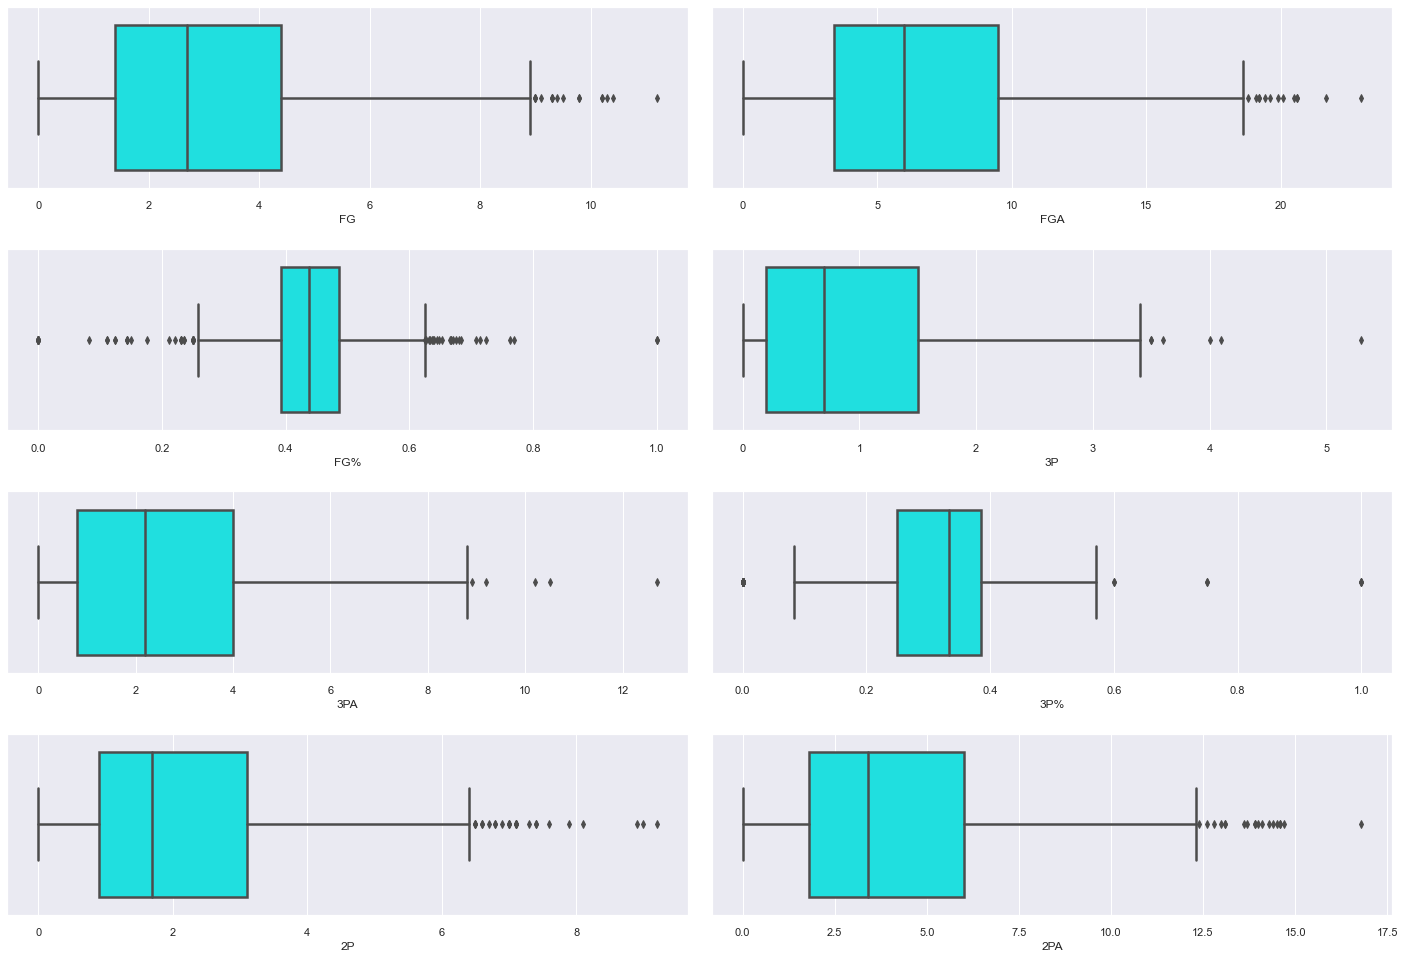

In [39]:
fig = plt.figure(figsize=(20,20))
for index,column in enumerate(list(df.columns[8:16])):
    plt.subplot(6,2,index+1)
    sns.boxplot(df.loc[:, column],color='cyan', linewidth=2.5)
fig.tight_layout(pad=2)

In [414]:
df_help=df.drop(['Player','Tm','Pos'], axis=1)

In [752]:
from scipy.stats import zscore
z_scores = zscore(df_help)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_df = df_help[filtered_entries]
filtered_df

Gender  Age   G  GS    MP   FG   FGA    FG%   3P  3PA    3P%   2P   2PA  \
0         1   21  61   4  12.1  2.0   3.7  0.544  0.0  0.0  0.000  2.0   3.7   
3         1   23  64  64  33.5  7.1  12.5  0.570  0.0  0.1  0.250  7.1  12.4   
4         1   35  26  23  25.9  5.4  11.4  0.473  1.2  3.1  0.388  4.2   8.3   
5         1   22  15   0   3.1  0.2   0.8  0.250  0.1  0.6  0.222  0.1   0.2   
6         1   22  46  13  21.9  4.2  10.0  0.419  1.7  4.8  0.347  2.5   5.2   
7         1   25  50  38  25.2  3.5   8.3  0.418  2.1  5.5  0.391  1.3   2.8   
9         1   30  23  14  18.9  1.7   4.3  0.384  0.3  1.6  0.216  1.3   2.7   
10        1   27  69  69  27.3  4.5   9.5  0.468  1.4  3.8  0.360  3.1   5.8   
12        1   23  15   0   3.7  0.2   0.7  0.300  0.0  0.0  0.000  0.2   0.7   
13        1   28  57   3   9.7  1.2   2.4  0.489  0.1  0.5  0.241  1.1   1.9   
14        1   36  69   3  24.5  4.7  11.3  0.421  1.9  4.7  0.409  2.8   6.6   
15        1   20  47  34  27.1  4.7  11.7  0.397  1.2  3.7  0.337  3.4   8.1   
16        1   23  43  43  33.3  5.8  12.1  0.480  2.4  6.1  0.398  3.4   6.0   
17        1   26  44   0  10.2  1.1   2.7  0.419  0.6  1.5  0.373  0.5   1.1   
18        1   35  30  27  28.0  3.3   8.0  0.411  1.7  4.8  0.350  1.6   3.3   
19        1   33  57  12  19.8  2.4   6.0  0.394  1.5  3.8  0.382  0.9   2.2   
20        1   20  54  32  23.3  2.4   5.8  0.417  1.0  3.1  0.315  1.4   2.7   
22        1   21  15   0   3.8  0.3   0.6  0.444  0.0  0.0  0.000  0.3   0.6   
23        1   25  72  50  25.7  4.1  10.1  0.402  0.8  2.9  0.285  3.2   7.2   
24        1   21  43  42  25.9  5.7  11.4  0.504  0.9  2.5  0.343  4.9   8.9   
25        1   19  51  31  28.8  5.7  13.2  0.436  1.8  5.1  0.352  3.9   8.1   
26        1   23  55  55  31.8  5.3  12.7  0.414  3.1  8.3  0.378  2.1   4.5   
27        1   22  46   5  15.8  3.1   6.5  0.472  0.8  2.6  0.322  2.3   4.0   
28        1   22  68  17  22.3  3.4   7.3  0.469  1.7  4.0  0.432  1.7   3.4   
29        1   28  58  58  36.2  5.5  11.1  0.497  1.7  4.4  0.391  3.8   6.7   
30        1   20  72  72  34.9  6.5  14.7  0.441  1.7  4.3  0.401  4.8  10.4   
31        1   30  56  52  31.0  4.6  10.9  0.426  1.8  4.6  0.381  2.9   6.3   
32        1   25  30   0   8.2  1.0   2.2  0.448  0.2  0.6  0.294  0.8   1.7   
33        1   32  67  38  27.4  2.9   6.1  0.464  1.6  4.1  0.404  1.2   2.1   
34        1   34  53  31  18.5  2.5   5.7  0.441  0.5  1.9  0.262  2.0   3.8   
35        1   31  67  18  19.9  2.6   5.9  0.449  1.1  2.7  0.408  1.5   3.1   
36        1   20  55  55  31.2  5.0  12.5  0.396  1.5  5.2  0.290  3.5   7.3   
38        1   24  37  36  32.8  7.1  16.2  0.440  3.5  8.7  0.399  3.7   7.5   
39        1   26   6   1  13.7  1.2   3.7  0.318  0.0  0.3  0.000  1.2   3.3   
40        1   26  51  12  19.1  2.3   4.5  0.513  0.3  1.0  0.264  2.0   3.4   
41        1   28  57   7  25.7  3.4   8.4  0.404  3.0  7.5  0.395  0.4   0.9   
42        1   32  37  34  22.5  2.5   5.9  0.423  1.5  3.8  0.397  1.0   2.1   
43        1   21  70  53  27.3  4.0   9.9  0.404  2.5  6.6  0.380  1.5   3.3   
44        1   22  18   0   3.9  0.4   1.2  0.318  0.1  0.2  0.250  0.3   1.0   
45        1   28  67  22  22.8  2.8   5.7  0.497  0.2  0.8  0.250  2.6   4.9   
46        1   21  45   3  12.5  1.8   4.3  0.428  0.4  1.8  0.253  1.4   2.6   
47        1   28  66  36  20.4  2.2   3.7  0.587  0.0  0.0  0.000  2.2   3.7   
48        1   32  37   3  16.1  2.4   5.3  0.454  0.7  2.3  0.318  1.7   3.0   
49        1   31  71  70  29.7  4.3  10.3  0.421  1.7  5.0  0.341  2.6   5.3   
51        1   28  44  27  29.7  6.1  12.8  0.473  3.3  7.6  0.438  2.8   5.3   
52        1   31  72  72  30.8  5.6  12.8  0.439  2.5  6.4  0.390  3.1   6.4   
53        1   21  32   2   5.0  0.8   1.8  0.431  0.3  0.8  0.375  0.5   1.1   
54        1   22   6   0   4.8  0.2   0.5  0.333  0.0  0.0  0.000  0.2   0.5   
56        1   21  40   8  10.8  0.8   2.0  0.370  0.3  1.2  0.277  0.4   0.9   
57   

In [753]:
index = filtered_df.index
number_of_rows = len(index)

print("Number of rows for filtered_df:",number_of_rows)

Number of rows for filtered_df: 550


In [754]:
index = df.index
number_of_rows = len(index)

print("Number of rows for df:",number_of_rows)

Number of rows for df: 655


###  Feature Selection

#### Without Scaling

In [755]:
x=filtered_df.drop('Gender',axis=1)
y=filtered_df['Gender']

In [756]:
from sklearn.feature_selection import SelectKBest, chi2

In [759]:
sel=SelectKBest(chi2,k=8)
sel.fit(x.iloc[:,:9],y)
idxs=sel.get_support(indices=True)
choosen_features_1=x.columns[idxs]
choosen_features_1

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FG%', '3P', '3PA'], dtype='object')

# Models 

In [421]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBClassifier

## Заклучок 

Би немал смисла да го земам атрибутот G GS  како features бидејќи јас правам класификација по пол,
Бидејќи правам калсификација по пол во моето множество машки играчи можат да иград до 82 игри во цела сезона,
Доколку женски до 36, освен ова и атрибутот Game Started, Minutes played исто така пи немал смисла бидејки не се исти кај машките.

In [760]:
X=filtered_df[["FG","FG%","3P","3PA"]]  # Features
y=filtered_df['Gender']  # Labels

### RandomForestClassifier

In [761]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [762]:
from sklearn import metrics
print("Accuracy: %.4f" %metrics.accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))

Accuracy: 0.7152
Precision: 0.7619
Recall: 0.9032


In [763]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  6  35]
 [ 12 112]]
              precision    recall  f1-score   support

           0       0.33      0.15      0.20        41
           1       0.76      0.90      0.83       124

    accuracy                           0.72       165
   macro avg       0.55      0.52      0.51       165
weighted avg       0.66      0.72      0.67       165



### XGBClassifier

In [764]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model = XGBClassifier()
model.fit(X_train,y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print('Accuracy XGBClassifier: {0}'.format(accuracy_score(y_test, predictions)))

[00:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy XGBClassifier: 0.6848484848484848


D:\Programs\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [765]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  6  38]
 [ 14 107]]
              precision    recall  f1-score   support

           0       0.30      0.14      0.19        44
           1       0.74      0.88      0.80       121

    accuracy                           0.68       165
   macro avg       0.52      0.51      0.50       165
weighted avg       0.62      0.68      0.64       165



In [766]:
print("Accuracy: %.4f" %metrics.accuracy_score(y_test, y_pred))
print('Precision: 2%.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))

Accuracy: 0.6848
Precision: 0.7379
Recall: 0.8843


### KNN

In [767]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [768]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [769]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [770]:
y_pred = classifier.predict(X_test)

In [771]:
print("Accuracy: %.4f" %metrics.accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))

Accuracy: 0.7727
Precision: 0.8218
Recall: 0.9222


In [772]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2 18]
 [ 7 83]]
              precision    recall  f1-score   support

           0       0.22      0.10      0.14        20
           1       0.82      0.92      0.87        90

    accuracy                           0.77       110
   macro avg       0.52      0.51      0.50       110
weighted avg       0.71      0.77      0.74       110



In [773]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

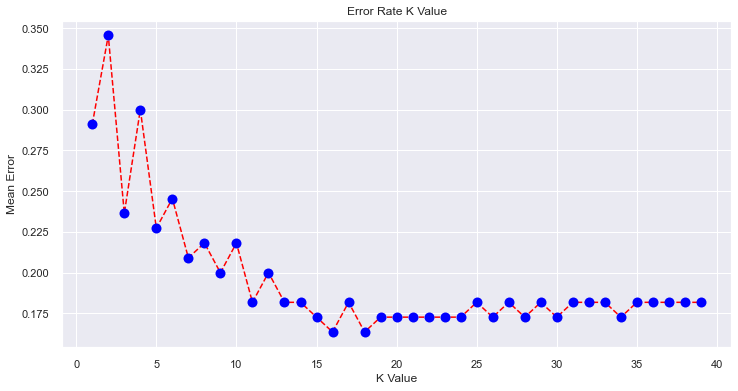

In [774]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Regression

### Linear Regression

In [739]:
X=np.array(df[['3P','2P','FG','AST',"STL"]])  # Features
y=np.array(df['PTS']) # Labels

In [740]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [741]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [742]:
y_pred = regressor.predict(X_test)

In [743]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.43212145167590743
Mean Squared Error: 0.34759085066065176
Root Mean Squared Error: 0.5895683596162974


In [744]:
print("R2 score : ",metrics.r2_score(y_test,y_pred))

R2 score :  0.9901667616664899


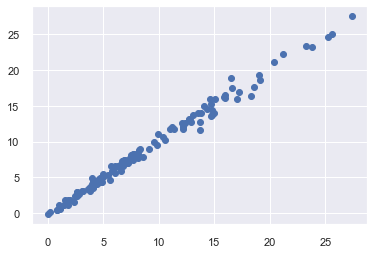

In [745]:
plt.scatter(y_test,y_pred)

### KNN Regressor

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [444]:
y_pred = reg.predict(X_test)

In [445]:
print(reg.score(X_test, y_test))

0.9822529257872511


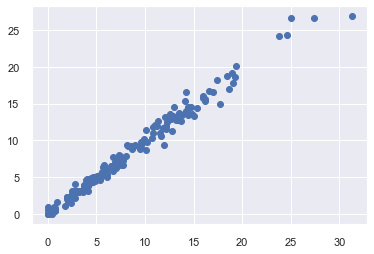

In [446]:
plt.scatter(y_test,y_pred)

In [447]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5388211382113822
Mean Squared Error: 0.6281775067750681
Root Mean Squared Error: 0.7925764990050286


In [448]:
print("R2 score : ",metrics.r2_score(y_test,y_pred))

R2 score :  0.9822529257872511


## Clustering

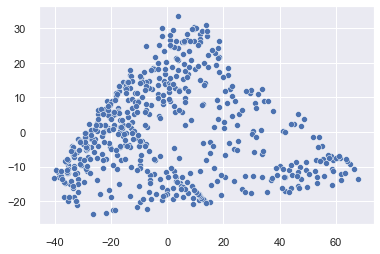

In [804]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit(filtered_df).transform(filtered_df)
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1])
plt.show()

In [477]:
def k_means(data, n_clusters):
    k_means = KMeans(n_clusters=n_clusters, max_iter=50, random_state=1)
    k_means.fit(data)
    labels = k_means.labels_
    centroids = k_means.cluster_centers_
    pd.DataFrame(centroids)
    sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels)
    sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker="*", color="g", s=500)
    plt.show()


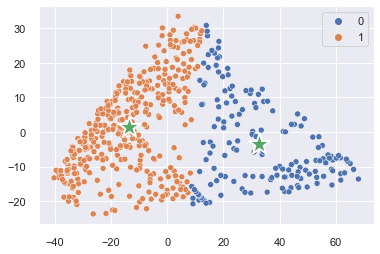

In [585]:
k_means(data_pca, 2)

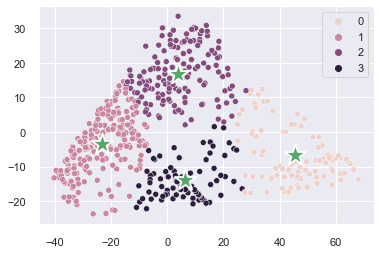

In [462]:
k_means(data_pca, 4)

D:\Programs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


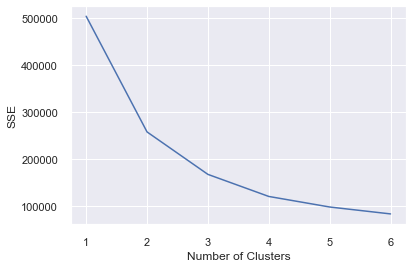

In [586]:
numClusters = 7
SSE = []
silhouette_coefficients = []
for k in range(1, numClusters):
    k_means = KMeans(n_clusters=k)
    k_means.fit(filtered_df)
    SSE.append(k_means.inertia_)
    if k<=1:
        continue
    score = silhouette_score(filtered_df, k_means.labels_)
    silhouette_coefficients.append(score)
plt.plot(range(1, numClusters), SSE);
plt.xlabel('Number of Clusters');
plt.ylabel('SSE');


In [587]:
from kneed import KneeLocator
kl = KneeLocator(range(1, numClusters), SSE, curve="convex", direction="decreasing")
kl.elbow

3

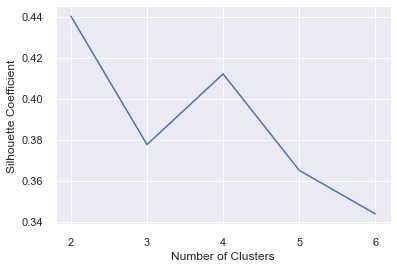

In [588]:
plt.plot(range(2, numClusters), silhouette_coefficients)
plt.xticks(range(2, numClusters))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


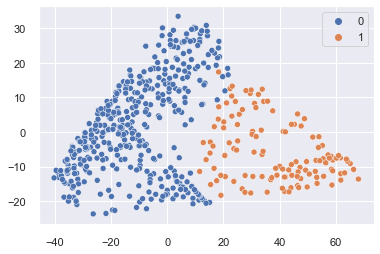

In [833]:
ac = AgglomerativeClustering(n_clusters=2).fit(filtered_df)
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=ac.labels_)
plt.show()


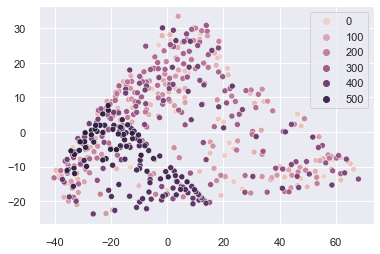

In [591]:
db = DBSCAN(eps=0.1, min_samples=1).fit(data_pca)
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=db.labels_)
plt.show()

## Oversampling

In [592]:
def oversample(df):
    classes = df.Gender.value_counts().to_dict()
    most = max(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['Gender'] == key]) 
    classes_sample = []
    for i in range(1,len(classes_list)):
        classes_sample.append(classes_list[i].sample(most, replace=True))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

In [805]:
oversample_df=filtered_df
oversample(oversample_df)

Gender  Age   G  GS    MP   FG   FGA    FG%   3P  3PA    3P%   2P   2PA  \
0         0   28  28   8  15.5  1.8   4.5  0.397  0.6  2.4  0.242  1.2   2.1   
1         0   29  29   2  14.3  2.0   4.6  0.439  0.9  1.7  0.500  1.1   2.8   
2         0   29  29  29  34.6  6.0  13.7  0.441  0.7  2.9  0.253  5.3  10.8   
3         0   26  26   0  11.7  1.0   2.5  0.385  0.1  0.3  0.250  0.9   2.2   
4         0   29  29  29  30.2  2.4   5.8  0.425  0.9  2.4  0.380  1.5   3.3   
5         0   29  29   0   7.6  0.9   2.7  0.342  0.6  1.6  0.400  0.3   1.2   
6         0   32  32  32  31.1  3.4   6.1  0.554  0.0  0.0  0.000  3.4   6.1   
7         0   30  30  21  25.1  3.5   9.5  0.370  0.5  2.3  0.232  3.0   7.2   
8         0   20  20   6  14.8  2.3   5.1  0.446  0.4  1.2  0.292  1.9   3.9   
9         0   29  29   0  24.5  4.4   8.0  0.545  0.3  1.2  0.250  4.1   6.8   
10        0   14  14   3  14.7  1.1   3.1  0.364  0.9  2.2  0.387  0.3   0.9   
11        0   30  30   4  16.3  1.6   4.4  0.368  0.3  1.1  0.303  1.3   3.3   
12        0   31  31   8  21.3  2.5   7.5  0.333  1.0  4.1  0.252  1.5   3.4   
13        0   32  32  32  26.0  3.6   8.0  0.444  2.0  4.7  0.417  1.6   3.3   
14        0   19  19  19  27.6  3.5   8.5  0.414  1.5  4.4  0.337  2.1   4.2   
15        0   32  32  32  31.6  4.5  10.3  0.433  1.9  5.0  0.379  2.6   5.3   
16        0   32  32   8  24.2  4.9  12.2  0.405  2.0  5.8  0.342  3.0   6.4   
17        0   11  11   1   9.9  1.7   2.9  0.594  0.0  0.2  0.000  1.7   2.7   
18        0   17  17  13  20.6  2.4   4.6  0.513  0.5  1.5  0.320  1.9   3.1   
19        0   18  18  18  31.7  6.1  11.4  0.532  0.6  1.7  0.367  5.4   9.7   
20        0   30  30  30  27.7  3.5   8.2  0.431  2.2  5.3  0.419  1.3   2.9   
21        0   31  31  11  13.1  1.0   2.1  0.500  0.0  0.1  0.000  1.0   2.0   
22        0   32  32   0   8.6  0.8   1.7  0.491  0.0  0.0  0.000  0.8   1.7   
23        0   13  13  11  20.8  3.8   8.5  0.455  0.8  2.3  0.333  3.1   6.2   
24        0   28  28   5  23.8  4.6   8.6  0.538  0.0  0.0  0.000  4.6   8.5   
25        0    7   7   2  15.1  2.0   4.1  0.483  0.0  0.0  0.000  2.0   4.1   
26        0   31  31   0  11.2  0.9   2.1  0.422  0.3  0.7  0.455  0.5   1.4   
27        0   14  14   0   8.5  0.4   1.9  0.231  0.1  0.5  0.143  0.4   1.4   
28        0   29  29   2  14.3  2.0   4.6  0.439  0.9  1.7  0.500  1.1   2.8   
29        0   26  26   0  25.6  4.9  11.3  0.437  1.7  4.4  0.386  3.2   6.9   
30        0   32  32  10  19.3  1.7   4.3  0.401  0.8  2.3  0.365  0.9   2.0   
31        0   28  28  25  27.3  3.8   9.1  0.421  0.4  1.7  0.255  3.4   7.4   
32        0   29  29   2  14.3  2.0   4.6  0.439  0.9  1.7  0.500  1.1   2.8   
33        0   31  31   9  23.9  3.2   6.5  0.495  0.0  0.1  0.000  3.2   6.5   
34        0   30  30  28  28.1  4.1   8.7  0.473  2.5  6.0  0.425  1.6   2.8   
35        0   30  30  27  23.8  3.5   8.2  0.429  1.0  3.6  0.280  2.5   4.7   
36        0   31  31  11  18.0  2.3   6.5  0.351  1.1  3.7  0.302  1.2   2.8   
37        0   32  32   8  17.8  2.0   4.8  0.428  0.4  1.5  0.298  1.6   3.3   
38        0   30  30  28  28.1  4.1   8.7  0.473  2.5  6.0  0.425  1.6   2.8   
39        0   32  32  32  23.8  2.5   4.8  0.516  0.0  0.0  0.000  2.5   4.8   
40        0   32  32  22  26.9  3.8   9.8  0.393  0.8  2.5  0.300  3.1   7.3   
41        0   30  30  27  23.8  3.5   8.2  0.429  1.0  3.6  0.280  2.5   4.7   
42        0   30  30  30  29.6  3.8   9.8  0.386  1.4  3.5  0.400  2.4   6.3   
43        0   26  26  11  24.4  4.7  10.4  0.448  2.1  4.6  0.454  2.6   5.8   
44        0   29  29   0  24.5  4.4   8.0  0.545  0.3  1.2  0.250  4.1   6.8   
45        0   31  31  13  22.0  3.1   8.3  0.379  0.8  2.4  0.324  2.4   5.9   
46        0   25  25   2  11.6  1.0   3.8  0.274  0.2  1.1  0.222  0.8   2.7   
47        0   27  27   8  21.4  1.5   4.7  0.323  0.9  2.9  0.291  0.7   1.8   
48        0   29  29   0   7.6  0.9   2.7  0.342  0.6  1.6  0.400  0.3   1.2   
49   

In [806]:
X=oversample_df[["FG","FG%","3P","3PA"]]  # Features
y=oversample_df['Gender']  # Labels

## RandomForest Classifier

In [807]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [808]:
print("Accuracy: %.4f" %metrics.accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))

Accuracy: 0.7818
Precision: 0.8392
Recall: 0.9023


In [809]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  9  23]
 [ 13 120]]
              precision    recall  f1-score   support

           0       0.41      0.28      0.33        32
           1       0.84      0.90      0.87       133

    accuracy                           0.78       165
   macro avg       0.62      0.59      0.60       165
weighted avg       0.76      0.78      0.77       165



### XGBClassifier

In [810]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model = XGBClassifier()
model.fit(X_train,y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("Accuracy: %.4f" %metrics.accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))

[00:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.6848
Precision: 0.7379
Recall: 0.8843


D:\Programs\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [811]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  6  38]
 [ 14 107]]
              precision    recall  f1-score   support

           0       0.30      0.14      0.19        44
           1       0.74      0.88      0.80       121

    accuracy                           0.68       165
   macro avg       0.52      0.51      0.50       165
weighted avg       0.62      0.68      0.64       165



### KNN

In [812]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [813]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [814]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [815]:
y_pred = classifier.predict(X_test)

In [816]:
print("Accuracy: %.4f" %metrics.accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))

Accuracy: 0.7182
Precision: 0.7624
Recall: 0.9167


In [817]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2 24]
 [ 7 77]]
              precision    recall  f1-score   support

           0       0.22      0.08      0.11        26
           1       0.76      0.92      0.83        84

    accuracy                           0.72       110
   macro avg       0.49      0.50      0.47       110
weighted avg       0.63      0.72      0.66       110



Text(0, 0.5, 'Mean Error')

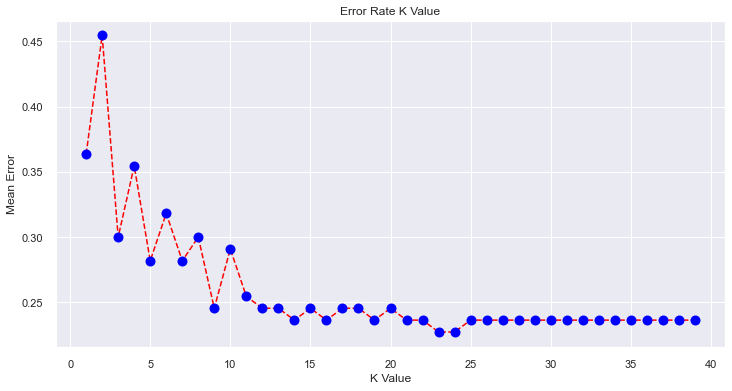

In [818]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Undersampling

In [819]:
def undersample(df):
    classes = df.Gender.value_counts().to_dict()
    least_class_amount = min(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['Gender'] == key]) 
    classes_sample = []
    for i in range(0,len(classes_list)-1):
        classes_sample.append(classes_list[i].sample(least_class_amount))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[-1]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

In [820]:
undersample_df=filtered_df
undersample(undersample_df)

Gender  Age   G  GS    MP   FG   FGA    FG%   3P  3PA    3P%   2P   2PA  \
0         1   25  19   0   7.2  1.1   1.5  0.724  0.0  0.0  0.000  1.1   1.5   
1         1   23  33   0   8.5  1.1   3.0  0.370  0.2  1.0  0.182  0.9   2.0   
2         1   21  70  53  27.3  4.0   9.9  0.404  2.5  6.6  0.380  1.5   3.3   
3         1   23  33   0   8.2  1.3   3.0  0.449  0.4  1.2  0.350  0.9   1.8   
4         1   31  67  18  19.9  2.6   5.9  0.449  1.1  2.7  0.408  1.5   3.1   
5         1   20  39   5  11.4  1.1   2.4  0.452  0.1  0.6  0.160  1.0   1.7   
6         1   25  13   0  12.7  2.3   4.2  0.545  0.2  0.8  0.182  2.2   3.4   
7         1   29  40   0  11.0  1.7   3.7  0.449  0.9  2.1  0.424  0.8   1.6   
8         1   27  70  10  19.3  3.6   7.6  0.473  2.2  4.9  0.452  1.4   2.7   
9         1   33  46   2  14.7  3.1   6.1  0.511  0.1  0.5  0.208  3.0   5.6   
10        1   22   6   0   2.5  0.2   0.7  0.250  0.0  0.2  0.000  0.2   0.5   
11        1   26  72  72  31.4  4.4  10.0  0.439  3.5  8.5  0.408  0.9   1.4   
12        1   20  26  23  32.1  6.0  14.1  0.425  1.9  6.2  0.311  4.1   7.9   
13        1   35  69   6  17.3  2.6   4.4  0.587  0.1  0.3  0.250  2.5   4.1   
14        1   26  71  71  37.6  8.5  18.6  0.456  2.3  5.5  0.411  6.2  13.1   
15        1   35  30  27  28.0  3.3   8.0  0.411  1.7  4.8  0.350  1.6   3.3   
16        1   30  60  42  27.5  3.3   8.2  0.404  2.5  6.3  0.389  0.9   1.9   
17        1   27  61  61  29.2  6.0   9.4  0.637  0.0  0.2  0.182  6.0   9.2   
18        1   29  46   2  29.3  5.5  13.4  0.412  1.9  5.7  0.337  3.6   7.7   
19        1   35  26  23  25.9  5.4  11.4  0.473  1.2  3.1  0.388  4.2   8.3   
20        1   25  35   0   9.2  1.8   3.9  0.449  0.7  1.7  0.400  1.1   2.2   
21        1   25  52  10  16.3  1.6   3.6  0.441  0.3  1.1  0.276  1.3   2.5   
22        1   25  60   1  12.0  1.6   3.7  0.422  0.9  2.5  0.371  0.6   1.2   
23        1   23  31   0   7.6  0.9   2.8  0.330  0.4  1.5  0.283  0.5   1.4   
24        1   33  17   1   8.7  1.2   3.2  0.389  1.1  2.4  0.439  0.2   0.8   
25        1   22  33   0   6.8  0.5   1.3  0.409  0.0  0.1  0.000  0.5   1.3   
26        1   28  36   7  23.5  2.9   6.8  0.424  1.5  4.1  0.369  1.4   2.7   
27        1   28  35  27  31.2  3.7   7.8  0.471  1.2  3.3  0.360  2.5   4.5   
28        1   24  43   0  13.4  1.6   3.2  0.500  0.5  1.3  0.375  1.1   1.9   
29        1   28  33  33  32.7  7.1  17.5  0.408  2.4  7.2  0.326  4.8  10.2   
30        1   30  57  57  28.7  4.5   9.7  0.467  2.2  4.9  0.450  2.3   4.8   
31        1   28  62   1  14.7  2.4   5.7  0.428  0.9  2.6  0.354  1.5   3.0   
32        1   22  42   0  20.9  4.1   9.5  0.434  2.0  5.0  0.401  2.1   4.5   
33        1   23  63  63  29.3  6.8  12.2  0.556  1.3  3.3  0.399  5.5   8.9   
34        1   21  37   1   7.3  1.0   2.1  0.474  0.1  0.1  0.600  0.9   2.0   
35        1   34  28  28  27.9  5.8  12.9  0.450  2.0  5.4  0.368  3.8   7.4   
36        1   27  29   4  10.9  1.9   3.9  0.496  0.1  0.5  0.200  1.8   3.4   
37        1   25  67  67  29.8  6.4  15.4  0.419  1.9  5.6  0.344  4.5   9.8   
38        1   28  69   4  22.8  2.4   5.6  0.434  1.5  3.9  0.371  1.0   1.7   
39        1   29  68   0  15.3  2.3   3.6  0.638  0.0  0.0  0.000  2.3   3.5   
40        1   30  50   8  16.1  2.2   4.5  0.480  0.8  2.1  0.368  1.4   2.4   
41        1   22  18   1  10.1  1.1   3.2  0.333  0.6  1.8  0.303  0.5   1.3   
42        1   24  66   8  17.8  2.6   6.6  0.390  1.0  2.8  0.368  1.6   3.8   
43        1   22  69  49  30.8  4.6  10.6  0.432  2.0  5.6  0.363  2.6   5.0   
44        1   24  61  34  19.0  1.8   3.2  0.548  0.1  0.3  0.235  1.7   3.0   
45        1   23  61   4  17.6  3.2   7.5  0.428  1.6  4.4  0.367  1.6   3.1   
46        1   29  31  25  25.8  3.4   8.7  0.389  0.5  2.0  0.246  2.9   6.7   
47        1   19  72  55  32.1  7.0  16.8  0.417  2.4  7.2  0.329  4.6   9.6   
48        1   26  52  52  36.5  6.5  16.7  0.389  3.3  9.2  0.366  3.2   7.6   
49   

### RandomForest Classifier

In [821]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7575757575757576


In [822]:
print("Accuracy: %.4f" %metrics.accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))

Accuracy: 0.7576
Precision: 0.7973
Recall: 0.9219


In [823]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  7  30]
 [ 10 118]]
              precision    recall  f1-score   support

           0       0.41      0.19      0.26        37
           1       0.80      0.92      0.86       128

    accuracy                           0.76       165
   macro avg       0.60      0.56      0.56       165
weighted avg       0.71      0.76      0.72       165



### XGBClassifier

In [824]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model = XGBClassifier()
model.fit(X_train,y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("Accuracy: %.4f" %metrics.accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))

[00:44:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.6848
Precision: 0.7379
Recall: 0.8843


D:\Programs\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [825]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  6  38]
 [ 14 107]]
              precision    recall  f1-score   support

           0       0.30      0.14      0.19        44
           1       0.74      0.88      0.80       121

    accuracy                           0.68       165
   macro avg       0.52      0.51      0.50       165
weighted avg       0.62      0.68      0.64       165



### KNN

In [826]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [827]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [828]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [829]:
y_pred = classifier.predict(X_test)

In [830]:
print("Accuracy: %.4f" %metrics.accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))

Accuracy: 0.8000
Precision: 0.8095
Recall: 0.9770


In [831]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3 20]
 [ 2 85]]
              precision    recall  f1-score   support

           0       0.60      0.13      0.21        23
           1       0.81      0.98      0.89        87

    accuracy                           0.80       110
   macro avg       0.70      0.55      0.55       110
weighted avg       0.77      0.80      0.75       110



Text(0, 0.5, 'Mean Error')

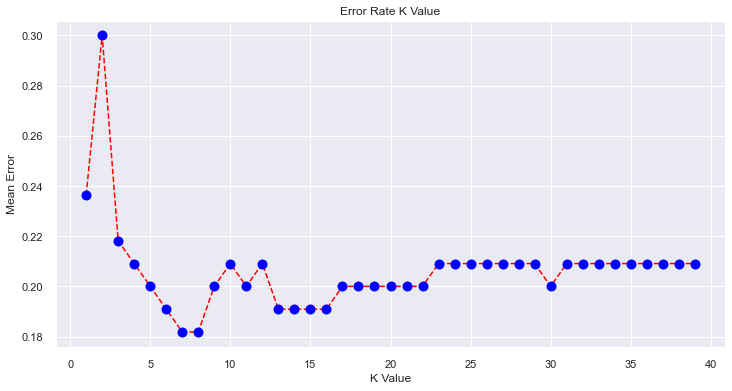

In [832]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Заклучок

За моделите јас користам за features тие што ги добивам од SelectKBest, но како класа го користам Gender
Свесен сум дека нема смисла тоа да се напраи, би бил добро ако имаше некоја класа за NBA Play-Off.
Значи тие играчи што успеат да се квалифицират со содветен тим во Playoff и така да можеме да ги класифицираме,
при што би добил по добри резултати при креирање на модели и слично.
